<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/BreastCancerDetectioni_using_ml_dl_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Breast Cancer Wisconsin (Diagnostic) Data Set**

---


Predict whether the cancer is benign or malignant

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#remove unwanted columns
df.drop(columns='Unnamed: 32', inplace= True)


In [ ]:
df.drop(columns='id', inplace= True)

In [ ]:
# check any missing value
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#check duplication
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
from sklearn.preprocessing import LabelEncoder


df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()    #0 beneign , 1 malignant

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.shape

(569, 31)

In [ ]:
x = df.iloc[:,1:32].values
x[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
y=df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train.shape

(455, 30)

In [ ]:
x_test.shape

(114, 30)

In [ ]:
y_train.shape

(455,)

In [ ]:
from sklearn.preprocessing import StandardScaler

x_train_std = StandardScaler().fit_transform(x_train)

x_test_std = StandardScaler().fit_transform(x_test)

1. Prediction breast cancer using **Machine Learning**

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
y_predict_lr_train= lr.predict(x_train)
y_predict_lr_test= lr.predict(x_test)

#evaluate accuracy
from sklearn.metrics import accuracy_score

lr_accurracy_train = accuracy_score(y_train,y_predict_lr_train)
lr_accurracy_test = accuracy_score(y_test,y_predict_lr_test)

print(round(lr_accurracy_train*100,2))
print(round(lr_accurracy_test*100,2))

96.26
95.61


In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict_dt_train= dt.predict(x_train)
y_predict_dt_test= dt.predict(x_test)

#evaluate accuracy
from sklearn.metrics import accuracy_score

dt_accurracy_train = accuracy_score(y_train,y_predict_dt_train)
dt_accurracy_test = accuracy_score(y_test,y_predict_dt_test)

print(round(dt_accurracy_train*100,2))
print(round(dt_accurracy_test*100,2))

100.0
93.86


In [ ]:
#evaluate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix

con_matrix =confusion_matrix(y_test,y_predict_lr_test)
print(con_matrix)

[[70  1]
 [ 4 39]]


<Axes: >

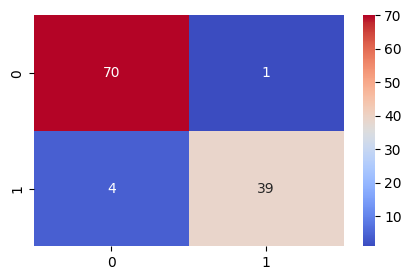

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(con_matrix,annot=True, cmap='coolwarm')

In [ ]:
#evaluate accuracy using precision and recall
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test,y_predict_lr_test)
print('Precision score:',round(precision*100,2))

print('--------------------------------')

recall = recall_score(y_test,y_predict_lr_test)
print('Recall score:', round(recall*100,2))


print('--------------------------------')

f1 = f1_score(y_test,y_predict_lr_test)
print('F1 score:', round(f1*100,2))

Precision score: 97.5
--------------------------------
Recall score: 90.7
--------------------------------
F1 score: 93.98


Build a predictive system

In [ ]:
input_data = (11.31,19.04,71.8,394.1,0.08139,0.04701,0.03709,0.0223,0.1516,0.05667,0.2727,0.9429,1.831,18.15,0.009282,0.009216,0.02063,0.008965,0.02183,0.002146,12.33,23.84,78,466.7,0.129,0.09148,0.1444,0.06961,0.24,0.06641)


#change the input into array
input_array = np.asarray(input_data)

#reshape the numpy array as we are predicting one data point
input_array_reshape = input_array.reshape(1,-1)

prediction = lr.predict(input_array_reshape)

print(prediction)

if prediction[0] == 0:
  print('Breast cancer is benign')

else:
  print('Breast cancer is malignant')

[0]
Breast cancer is benign


In [ ]:
input_data = (11.31,19.04,71.8,394.1,0.08139,0.04701,0.03709,0.0223,0.1516,0.05667,0.2727,0.9429,1.831,18.15,0.009282,0.009216,0.02063,0.008965,0.02183,0.002146,12.33,23.84,78,466.7,0.129,0.09148,0.1444,0.06961,0.24,0.06641)

#change the input into array
input_array = np.asarray(input_data)

#reshape the numpy array as we are predicting one data point
input_array_reshape = input_array.reshape(1,-1)

prediction = dt.predict(input_array_reshape)

print(prediction)

if prediction[0] == 0:
  print('Breast cancer is benign')

else:
  print('Breast cancer is malignant')

[0]
Breast cancer is benign


In [ ]:
x_train.shape[1]

30

2. Prediction breast cancer using **Deep Learning**
-binary classification

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#setting up layers of neural network
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=x_train.shape[1])) #input_dim = number of features
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='sigmoid'))


In [ ]:
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])





In [ ]:
#train the neural network
history = model.fit(x_train_std, y_train,validation_split=0.1, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 15ms/step - loss: 0.7525 - accuracy: 0.4328 - val_loss: 0.6478 - val_accuracy: 0.5870
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7653 - val_loss: 0.4590 - val_accuracy: 0.8913
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3851 - accuracy: 0.9120 - val_loss: 0.3244 - val_accuracy: 0.8913
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2758 - accuracy: 0.9389 - val_loss: 0.2372 - val_accuracy: 0.9130
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9438 - val_loss: 0.1840 - val_accuracy: 0.9348
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.9633 - val_loss: 0.1502 - val_accuracy: 0.9348
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1284 - accuracy: 0.9633 - val_loss: 0.1266 - val_accuracy: 0.9565
Epoch 8/100


visualise the loss and accuracy

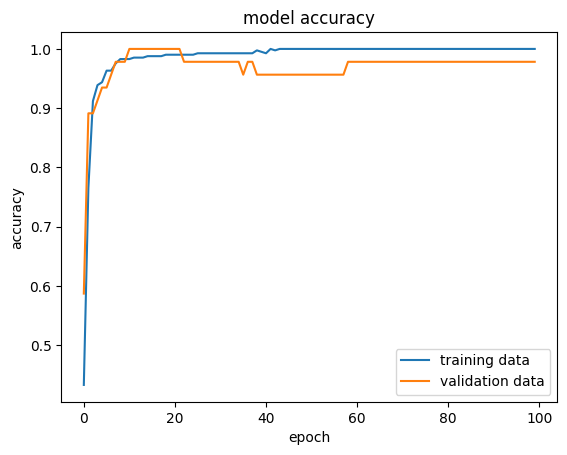

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

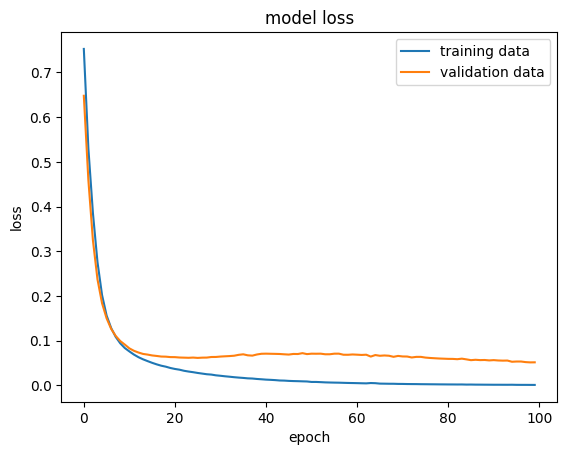

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model using test data

In [ ]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


4/4 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9825
Test Loss: 0.1700047254562378, Test Accuracy: 0.9824561476707458


In [ ]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[-0.4877952  -0.25088379 -0.46378664 -0.51543986  0.05784012 -0.0262922
 -0.10351188 -0.31929301  0.40877389  0.11968017 -0.0858903  -0.39144008
 -0.22090758 -0.2944085  -0.10670318 -0.38822597 -0.05805714 -0.18386347
 -0.30097441 -0.05389032 -0.29186744 -0.2492245  -0.34337233 -0.37693497
  0.32080655 -0.13570975  0.0219982  -0.21989091  0.23083947  0.17173277]


In [ ]:
y_predict_ann = model.predict(x_test_std)
print(y_predict_ann.shape)
print(y_predict_ann)

4/4 [==============================] - 0s 4ms/step
(114, 2)
[[9.89503801e-01 5.30899838e-02]
 [3.58594235e-07 9.99924600e-01]
 [1.14220915e-04 9.95795846e-01]
 [9.99986053e-01 8.20237328e-04]
 [9.99999046e-01 1.37255265e-04]
 [7.68384244e-15 1.00000000e+00]
 [2.09497892e-12 9.99999940e-01]
 [1.28042735e-02 9.18260932e-01]
 [9.33280170e-01 3.15281570e-01]
 [9.99979138e-01 6.46986533e-04]
 [8.53618681e-01 1.49981737e-01]
 [1.54308099e-02 9.43114221e-01]
 [9.99684989e-01 4.64372337e-03]
 [8.45542364e-03 9.73192036e-01]
 [9.99997973e-01 4.55925940e-04]
 [3.26442969e-04 9.98030365e-01]
 [9.99997377e-01 3.64611595e-04]
 [9.99999762e-01 6.44785978e-05]
 [1.00000000e+00 5.24966026e-06]
 [4.52230164e-09 9.99992549e-01]
 [9.99488771e-01 1.54699059e-02]
 [9.99896348e-01 5.53655811e-03]
 [1.25505034e-13 1.00000000e+00]
 [9.99948740e-01 5.17687295e-04]
 [9.99924421e-01 4.82778618e-04]
 [9.99999940e-01 9.33420015e-05]
 [9.99998927e-01 2.72620760e-04]
 [9.98369932e-01 5.35721192e-03]
 [9.99950945e-01

In [ ]:
input_data = (15.46,11.89,102.5,736.9,0.1257,0.1555,0.2032,0.1097,0.1966,0.07069,0.4209,0.6583,2.805,44.64,0.005393,0.02321,0.04303,0.0132,0.01792,0.004168,18.79,17.04,125,1102,0.1531,0.3583,0.583,0.1827,0.3216,0.101)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
from sklearn.preprocessing import StandardScaler

input_data_std = StandardScaler().fit_transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0]==0):
  print('breast cancer is benign')

else:
  print('breast cancer is malignant')


1/1 [==============================] - 0s 18ms/step
[[0.85815394 0.24723105]]
[0]
breast cancer is benign
